# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In [3]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [4]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62.6 MB 1.3 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.2 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6751872 sha256=a6677aa1091bf827c2036b8870c90114a68570e8d9b90bc2423946fca46077f2
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

In [5]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [6]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet 

In [7]:
#Initializing Plotly
import plotly.io as pio

## Importing the Dataset & Exploring it

In [9]:
df = pd.read_csv('AMZN.csv')

In [10]:
#read_csv function from pandas

In [11]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-17,88.773499,92.889000,84.461998,90.391998,90.391998,218342000
1,2020-03-18,87.500000,92.083000,87.250000,91.500000,91.500000,192904000
2,2020-03-19,93.000000,97.250000,91.632500,94.046501,94.046501,207998000
3,2020-03-20,96.315498,97.849998,91.036499,92.304497,92.304497,196358000
4,2020-03-23,91.387497,95.970001,90.599998,95.141502,95.141502,156170000
...,...,...,...,...,...,...,...
247,2021-03-10,154.922501,155.822998,151.502502,152.882004,152.882004,60250000
248,2021-03-11,155.200500,156.589005,154.146500,155.679504,155.679504,55528000
249,2021-03-12,153.750000,154.949005,152.274994,154.474503,154.474503,48438000
250,2021-03-15,153.728500,154.112000,151.604507,154.084000,154.084000,58272000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [13]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,146.636385,148.516230,144.515526,146.545488,146.545488,9.343610e+07
std,21.394759,21.336638,21.014379,21.036693,21.036693,3.496016e+07
min,87.500000,92.083000,84.461998,90.391998,90.391998,2.903800e+07
25%,131.937500,132.923996,130.684754,131.727623,131.727623,6.659350e+07
50%,156.125504,157.889999,154.284752,155.694999,155.694999,8.566900e+07
75%,160.450871,162.355881,158.278626,160.265873,160.265873,1.118900e+08
max,177.350006,177.612503,174.334503,176.572495,176.572495,2.407640e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [14]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [15]:
px.area(df, x="Date", y="Close")

In [16]:
px.line(df, x="Date", y="Close")

In [17]:
px.area(df, x="Date", y="Volume")

In [18]:
px.bar(df, y="Volume")

In [19]:
px.box(df, y="Close")

# Understanding Facebook Prophet

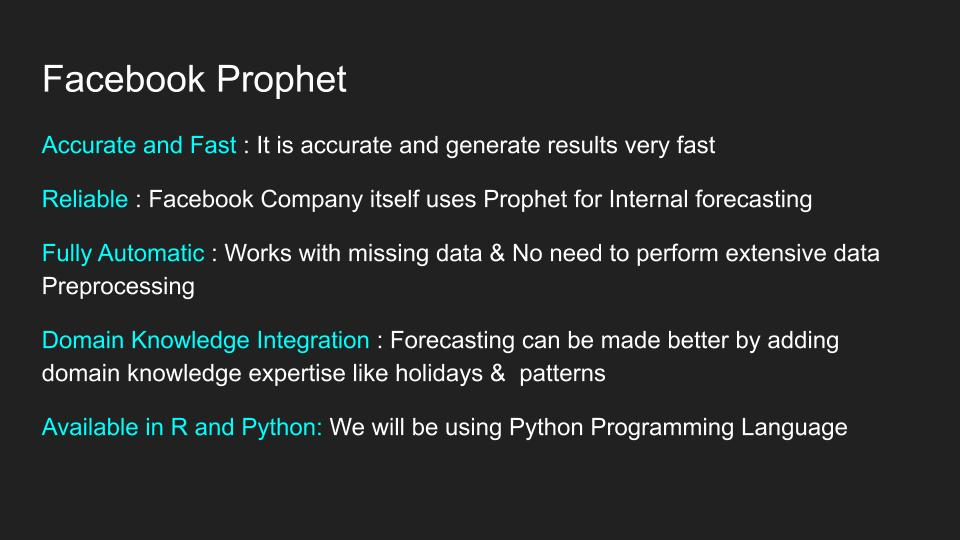

## Data Preperation

In [20]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-17,88.773499,92.889000,84.461998,90.391998,90.391998,218342000
1,2020-03-18,87.500000,92.083000,87.250000,91.500000,91.500000,192904000
2,2020-03-19,93.000000,97.250000,91.632500,94.046501,94.046501,207998000
3,2020-03-20,96.315498,97.849998,91.036499,92.304497,92.304497,196358000
4,2020-03-23,91.387497,95.970001,90.599998,95.141502,95.141502,156170000
...,...,...,...,...,...,...,...
247,2021-03-10,154.922501,155.822998,151.502502,152.882004,152.882004,60250000
248,2021-03-11,155.200500,156.589005,154.146500,155.679504,155.679504,55528000
249,2021-03-12,153.750000,154.949005,152.274994,154.474503,154.474503,48438000
250,2021-03-15,153.728500,154.112000,151.604507,154.084000,154.084000,58272000


In [21]:
columns=["Date","Close"]
ndf  = pd.DataFrame(df, columns = columns)

In [22]:
ndf

,Date,Close
0,2020-03-17,90.391998
1,2020-03-18,91.500000
2,2020-03-19,94.046501
3,2020-03-20,92.304497
4,2020-03-23,95.141502
...,...,...
247,2021-03-10,152.882004
248,2021-03-11,155.679504
249,2021-03-12,154.474503
250,2021-03-15,154.084000


In [23]:
prophet_df = ndf.rename(columns={'Date':'ds','Close':'y'})

In [24]:
prophet_df

,ds,y
0,2020-03-17,90.391998
1,2020-03-18,91.500000
2,2020-03-19,94.046501
3,2020-03-20,92.304497
4,2020-03-23,95.141502
...,...,...
247,2021-03-10,152.882004
248,2021-03-11,155.679504
249,2021-03-12,154.474503
250,2021-03-15,154.084000


## Creating Facebook Prophet Model

In [25]:
m = Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [26]:
future = m.make_future_dataframe(periods = 30)
forecast = m.predict(future)

In [27]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-17,93.510740,87.115468,100.867507,93.510740,93.510740,0.756497,0.756497,0.756497,0.756497,0.756497,0.756497,0.0,0.0,0.0,94.267237
1,2020-03-18,93.966050,88.250200,102.161102,93.966050,93.966050,1.058431,1.058431,1.058431,1.058431,1.058431,1.058431,0.0,0.0,0.0,95.024481
2,2020-03-19,94.421361,88.858398,101.990961,94.421361,94.421361,0.938876,0.938876,0.938876,0.938876,0.938876,0.938876,0.0,0.0,0.0,95.360236
3,2020-03-20,94.876671,88.040922,101.488513,94.876671,94.876671,0.037713,0.037713,0.037713,0.037713,0.037713,0.037713,0.0,0.0,0.0,94.914384
4,2020-03-23,96.242603,89.713857,103.416211,96.242603,96.242603,0.473733,0.473733,0.473733,0.473733,0.473733,0.473733,0.0,0.0,0.0,96.716335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2021-04-11,157.334081,148.291656,162.560906,156.789501,157.914520,-1.632624,-1.632624,-1.632624,-1.632624,-1.632624,-1.632624,0.0,0.0,0.0,155.701457
278,2021-04-12,157.320254,150.683150,164.345175,156.739345,157.936606,0.473733,0.473733,0.473733,0.473733,0.473733,0.473733,0.0,0.0,0.0,157.793986
279,2021-04-13,157.306427,151.452227,164.819699,156.681956,157.967975,0.756497,0.756497,0.756497,0.756497,0.756497,0.756497,0.0,0.0,0.0,158.062923
280,2021-04-14,157.292600,152.013620,165.136085,156.619937,157.990409,1.058431,1.058431,1.058431,1.058431,1.058431,1.058431,0.0,0.0,0.0,158.351030


In [28]:
px.line(forecast, x='ds', y='yhat')

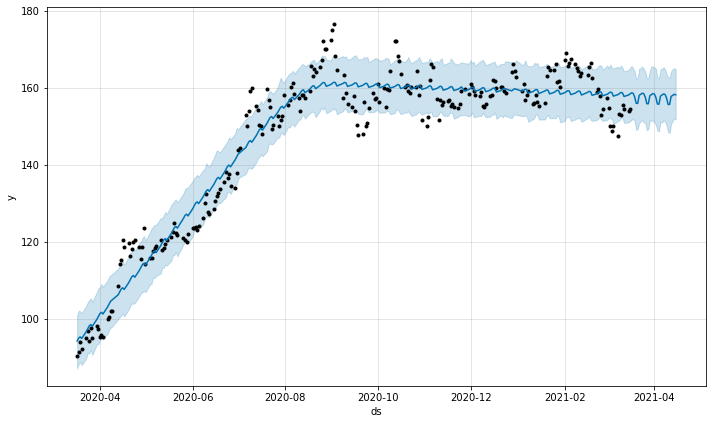

In [29]:
figure = m.plot(forecast, xlabel = 'ds', ylabel='y')

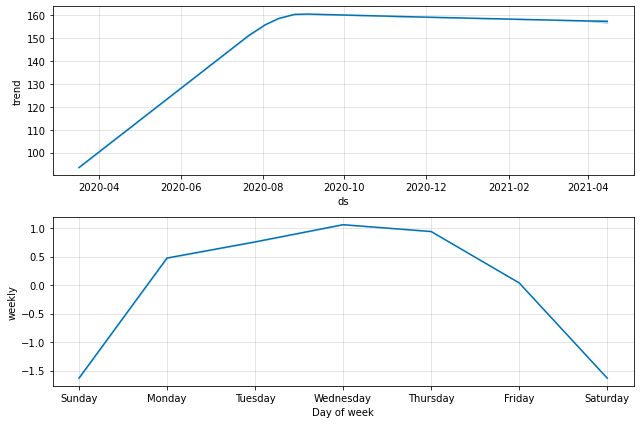

In [30]:
figure2 = m.plot_components(forecast)

In [31]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Downloading the Forecast data